In [84]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 1
we’ll look at data about Intel stock (Intel-1998 dataset from
the zip file posted with this homework). The data covers stock market trading for the
Intel Corporation in 1998. Each row is a day, with the following columns: Date,
Trading Day (integer day number, including skips), Open (price at market open),
High (highest price of day), Low (lowest price of day), Close (price at market close),
Volume (shares traded), and Adj. Close (adjusted closing price, meaning accounting
for stock splits, which are not a problem in this data). Remember not every day will
have data. 

In [47]:
data = pd.read_csv('./Data/Intel-1998.csv')

In [48]:
data.shape

(252, 8)

In [49]:
data.head()

,Date,Trading Day,Open,High,Low,Close,Volume,Adj Close
0,1/2/1998,1,70.69,72.62,70.50,72.62,40927200,16.94
1,1/5/1998,4,73.06,75.14,72.00,74.50,78368400,17.37
2,1/6/1998,5,73.87,74.31,72.69,73.12,48313600,17.05
3,1/7/1998,6,72.75,73.62,71.56,72.75,55380800,16.97
4,1/8/1998,7,72.25,74.81,72.12,74.31,75730400,17.33


A. Graph the closing price vs. the date with an ordinary line graph. If you
use Tableau, you need to right-click on the Date and choose Exact Date from
the dropdown menu so that it uses the full date with "day". 

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


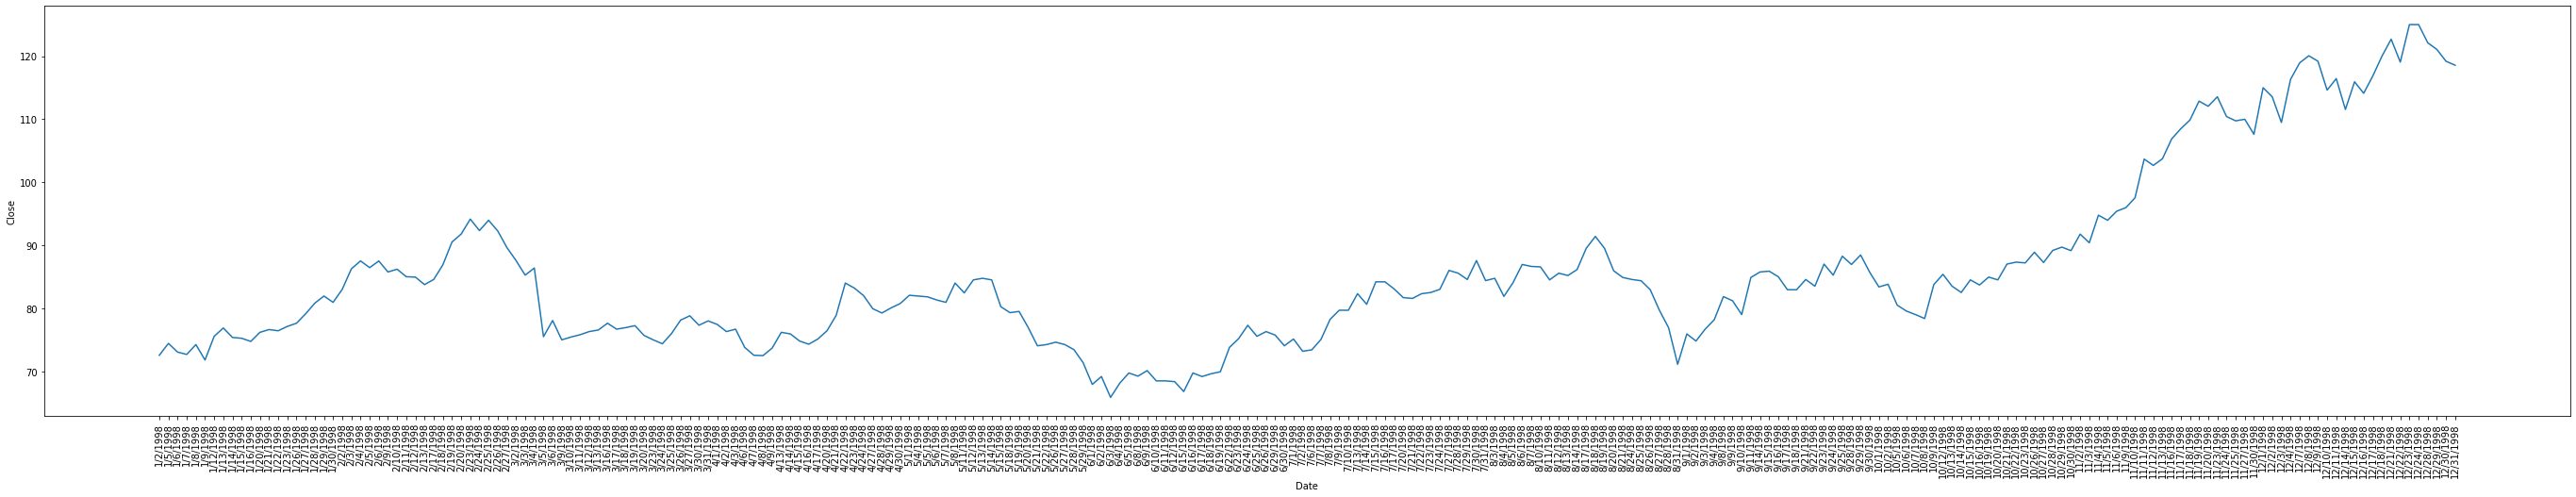

In [50]:
plt.figure(figsize=(48, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.lineplot(data['Date'],data['Close']);

B. Graph the Volume vs. the exact Date as in the last part with a bar graph. 

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


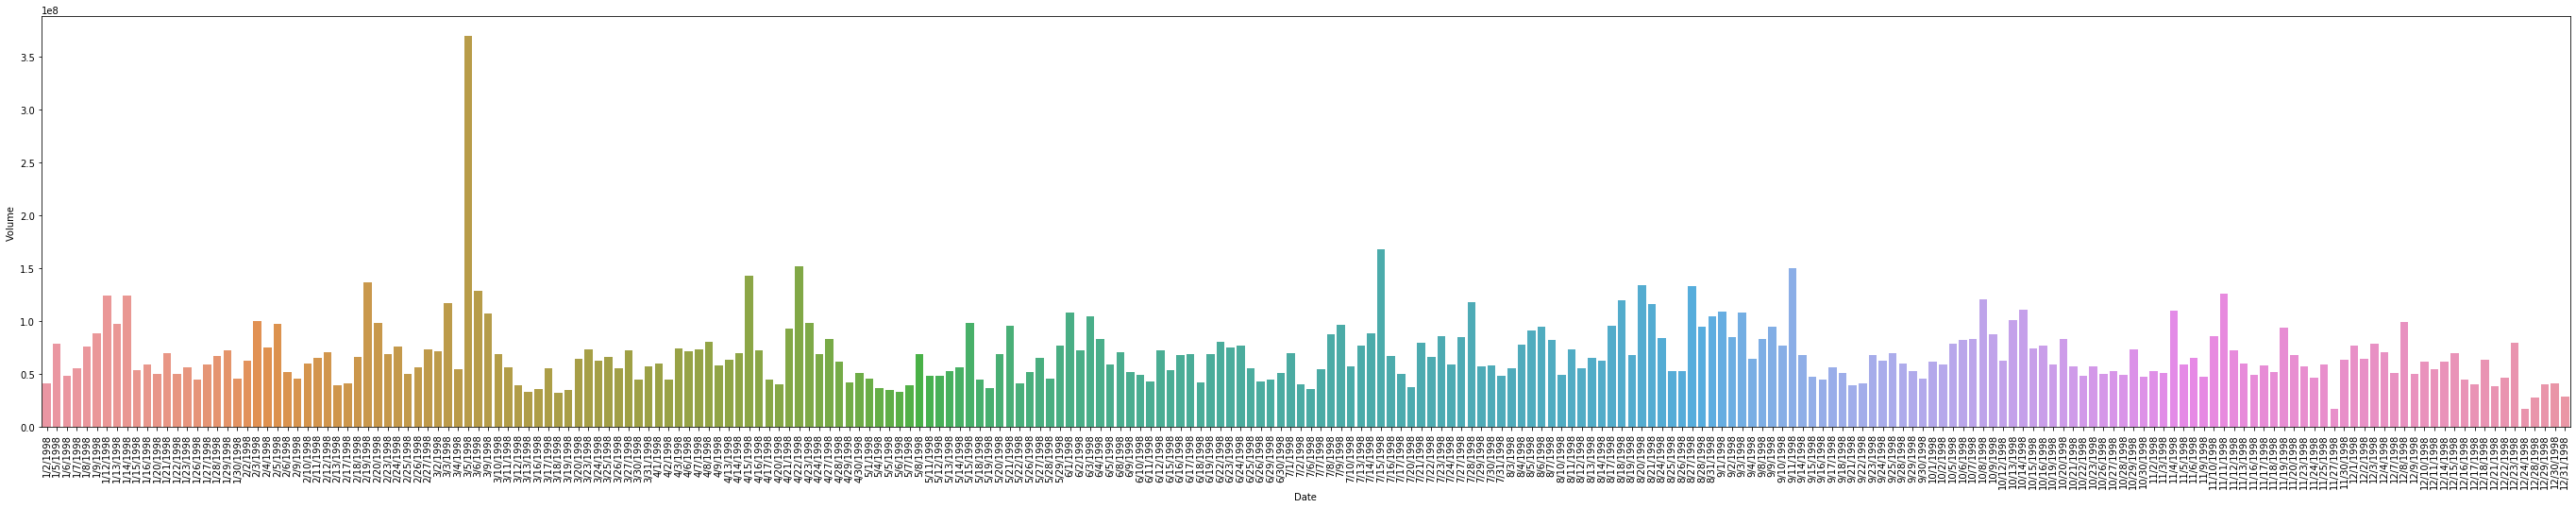

In [51]:
plt.figure(figsize=(48, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(data['Date'],data['Volume']);

C. Create a histogram of the daily stock Volume. R has the hist command
and a ggplot geom. In Tableau, the Histogram graph type in the Show Me box
will be useful. Experiment with the bin size. It’s an optional parameter in the
R functions (e.g. n=20 for hist or bins=20 for geom_histogram). In Tableau,
after you have the histogram, right click the “Volume (bin)” in the data bar on
the far left and use Edit. In Tableau, it’s not the number of bins, but their
width (in terms of data). You can set them that way in R as well with
different parameters. 

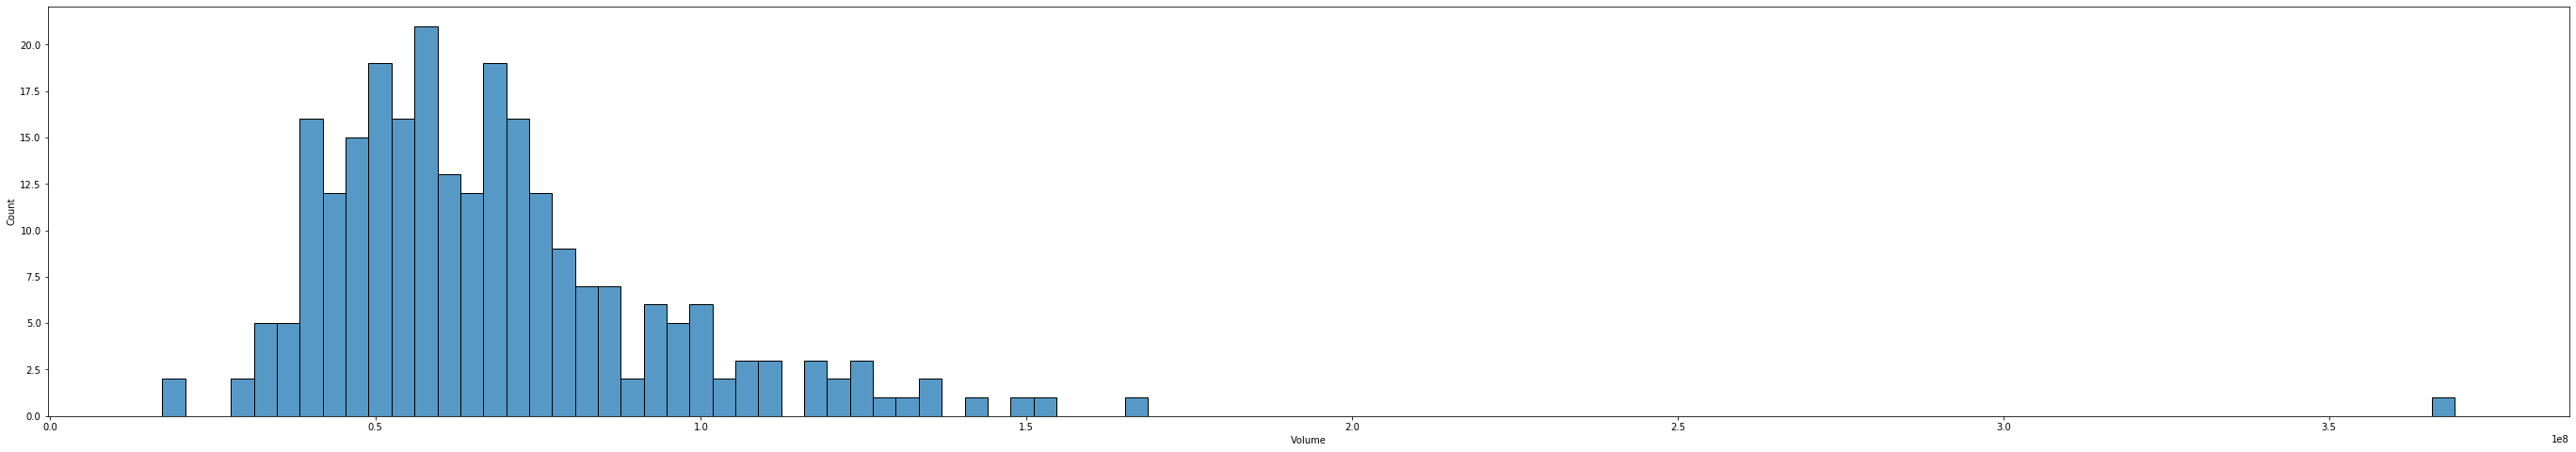

In [52]:
plt.figure(figsize=(48, 8))
# plt.xticks(rotation=90)
sns.histplot(data['Volume'],bins=100);

D. Create a scatterplot that graphs the Volume on the x-axis and the daily
price range on the y-axis. You will need to create an additional column that
contains the "range" of the prices for the day as the difference between the
fields High and Low. 

In [53]:
data['Range'] = data['High']-data['Low']

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


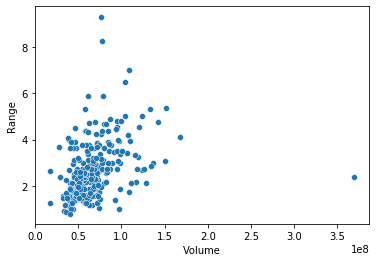

In [54]:
# plt.figure(figsize=(16, 4))
# plt.xticks(rotation=90)
sns.scatterplot(data['Volume'],data['Range']);

E. Look for outliers in this
data and remove them. Experiment with recreating the above graphs (all 4
minimum to get this EC) and describe exactly what you did and if it helped
make the graphs better. 

Based on the graphs only we can see that there is one outlier in terms of volume of stocks traded which corresponds to 3/5/1998 date. To rectify this we can either remove the data point or take an average of previous and next day volume.

We follow the latter way to rectify the outlier.

In [55]:
data = data[data['Volume']<=data['Volume'].mean()+6*data['Volume'].std()]

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


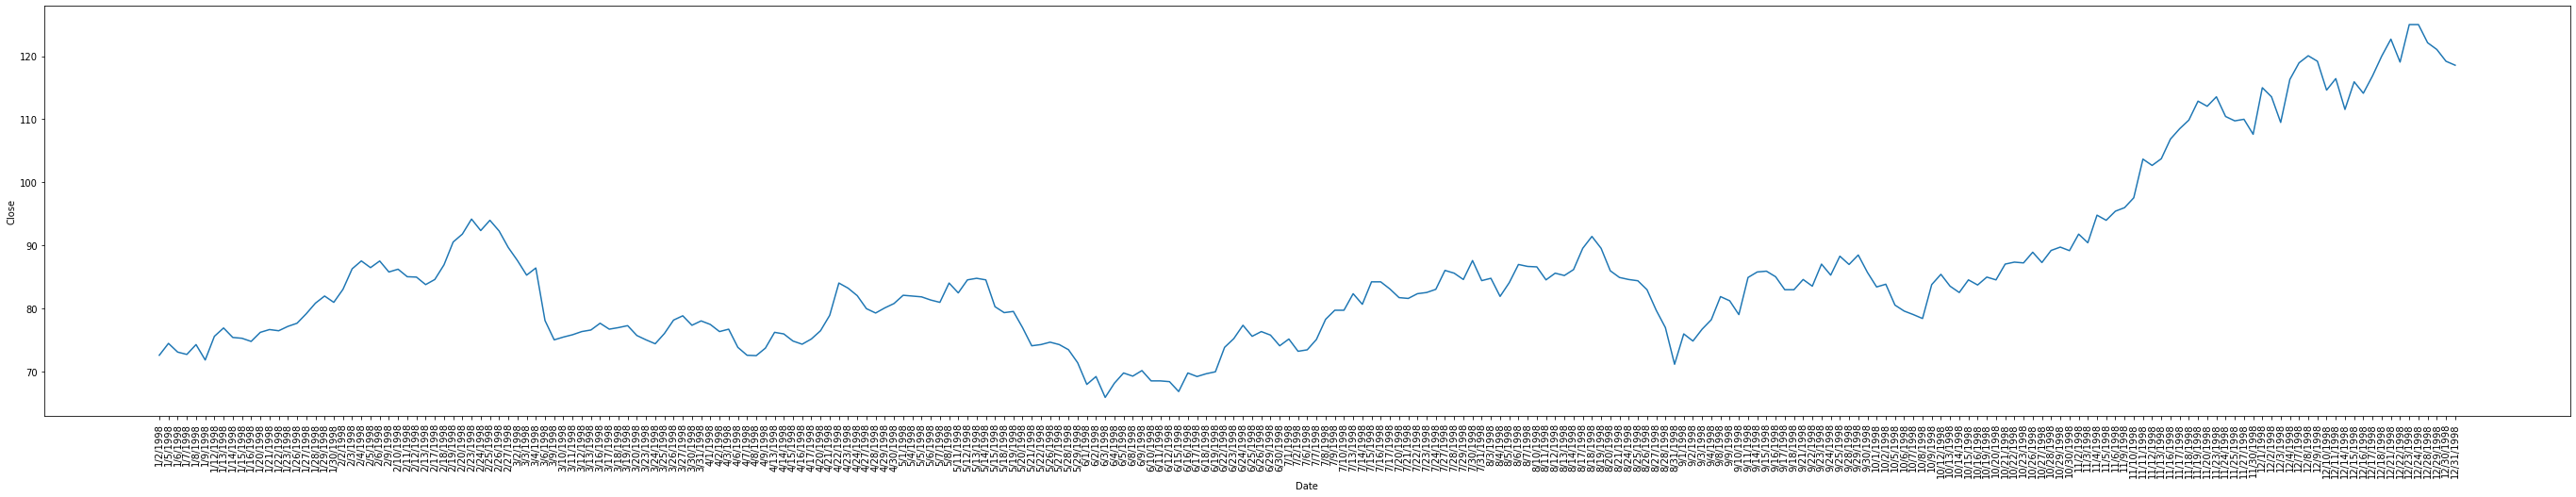

In [56]:
plt.figure(figsize=(48, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.lineplot(data['Date'],data['Close']);

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


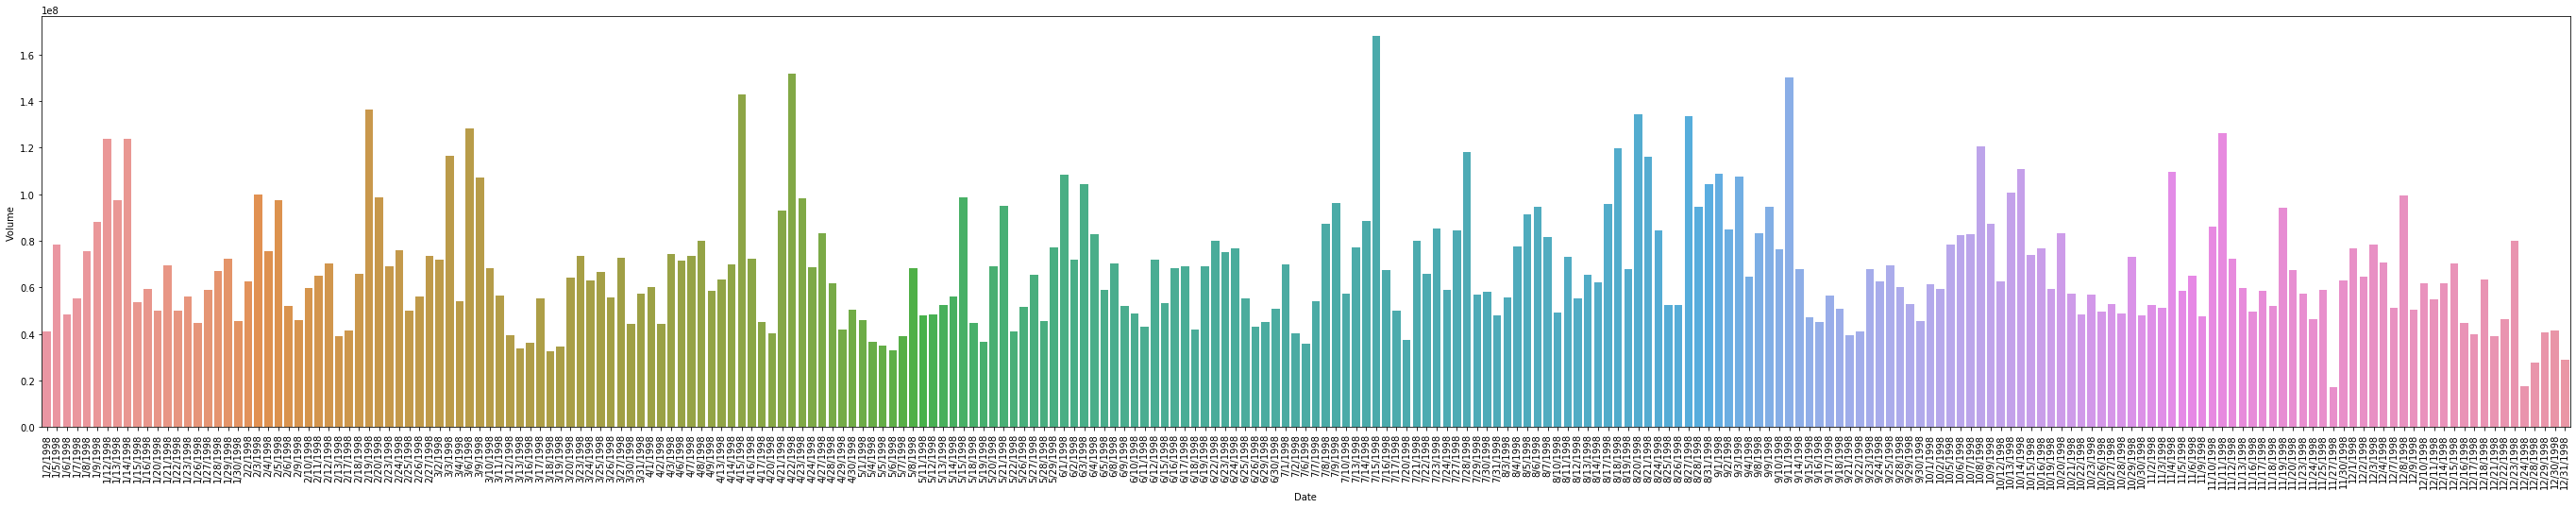

In [57]:
plt.figure(figsize=(48, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(data['Date'],data['Volume']);

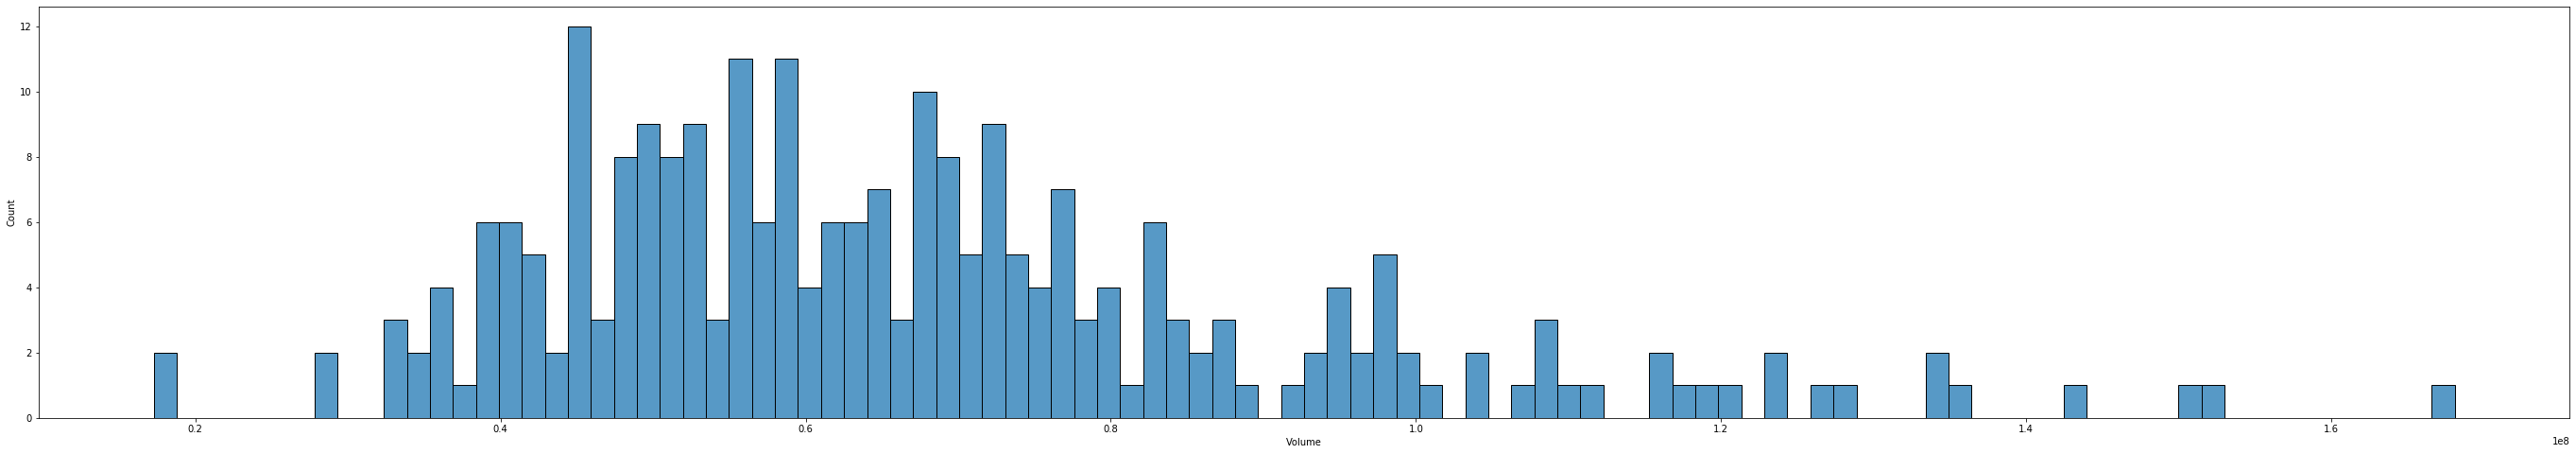

In [61]:
plt.figure(figsize=(48, 8))
# plt.xticks(rotation=90)
sns.histplot(data['Volume'],bins=100);

C:\Users\sahilmehta\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


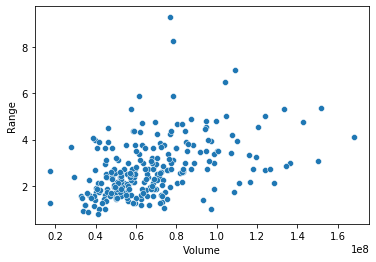

In [59]:
# plt.figure(figsize=(16, 4))
# plt.xticks(rotation=90)
sns.scatterplot(data['Volume'],data['Range']);

## 2 
We will analyze some perception data collected from a class to see how
accurate students were at perceiving values with different encodings (aligned bar vs.
unaligned bars vs. volume, etc.). Use the PerceptionExperiment.csv data file, which
has data from 92 students in previous years’ classes. Remember that you saw a
sequence of slides each with four encoded values, marked A, B, C and D. 

In [62]:
data = pd.read_csv('./Data/PerceptionExperiment1.csv')

In [63]:
data.head()

,Test,Display,TestNumber,Trial,Subject,Response,TrueValue
0,"Veritcal Distance, Aligned",1,1,B,1,0.60,0.6
1,"Veritcal Distance, Aligned",1,1,B,2,0.55,0.6
2,"Veritcal Distance, Aligned",1,1,B,3,0.70,0.6
3,"Veritcal Distance, Aligned",1,1,B,4,0.60,0.6
4,"Veritcal Distance, Aligned",1,1,B,5,0.65,0.6


In [64]:
data.shape

(4416, 7)

In [65]:
data['Error'] = data['Response'] - data['TrueValue']

A. A histogram of the overall distribution of Error. 

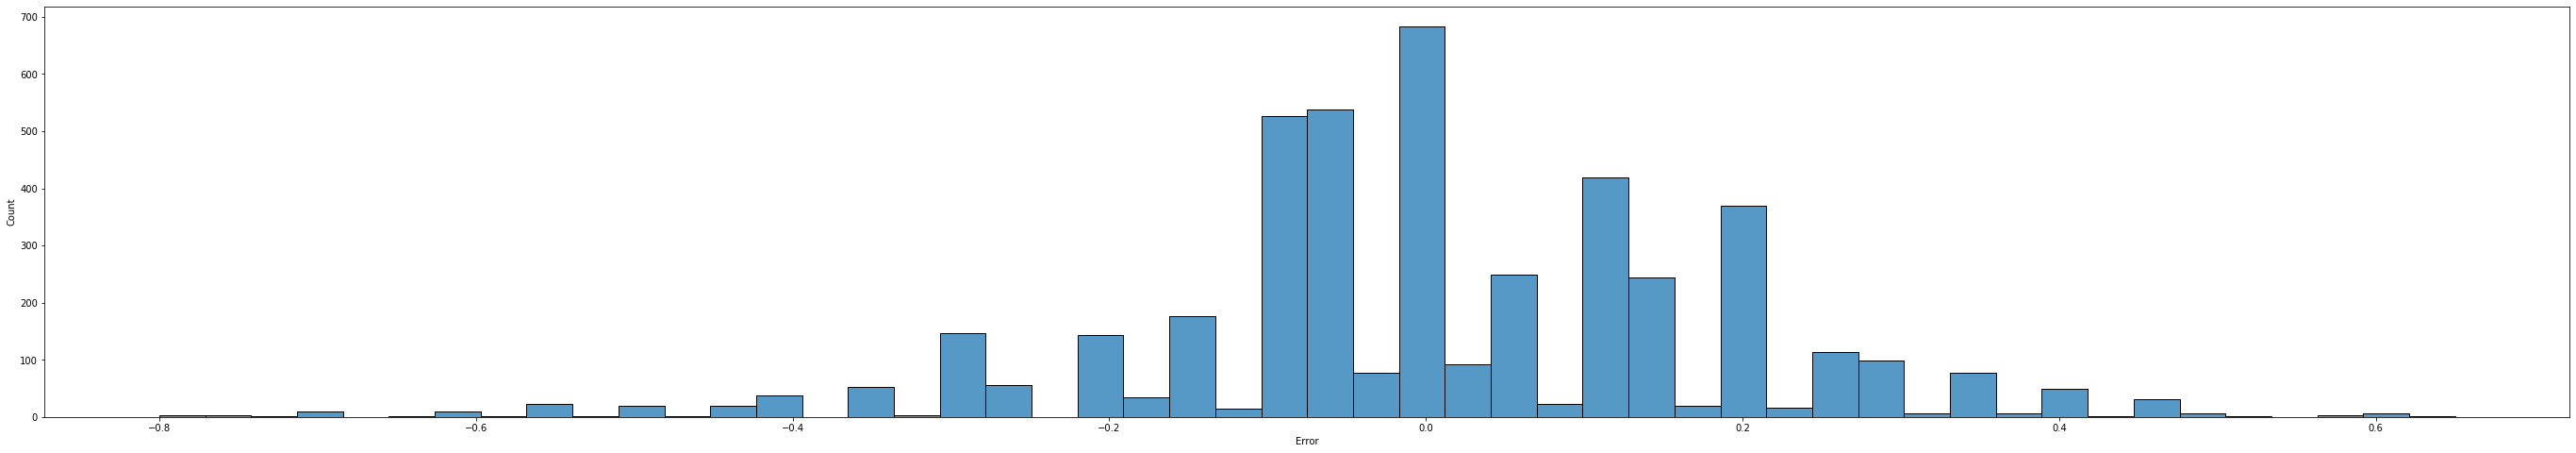

In [67]:
plt.figure(figsize=(48, 8))
# plt.xticks(rotation=90)
sns.histplot(data['Error'],bins=50);

B. A bar graph of the median Error by Test (aka Error vs. Test). Do not
subdivide by Display or the Trial. Order the x-axis to make the graph as clear
as possible. Remember, for bar graphs in general, do not necessarily keep the
default order (e.g. alphabetical) of the x-axis. 

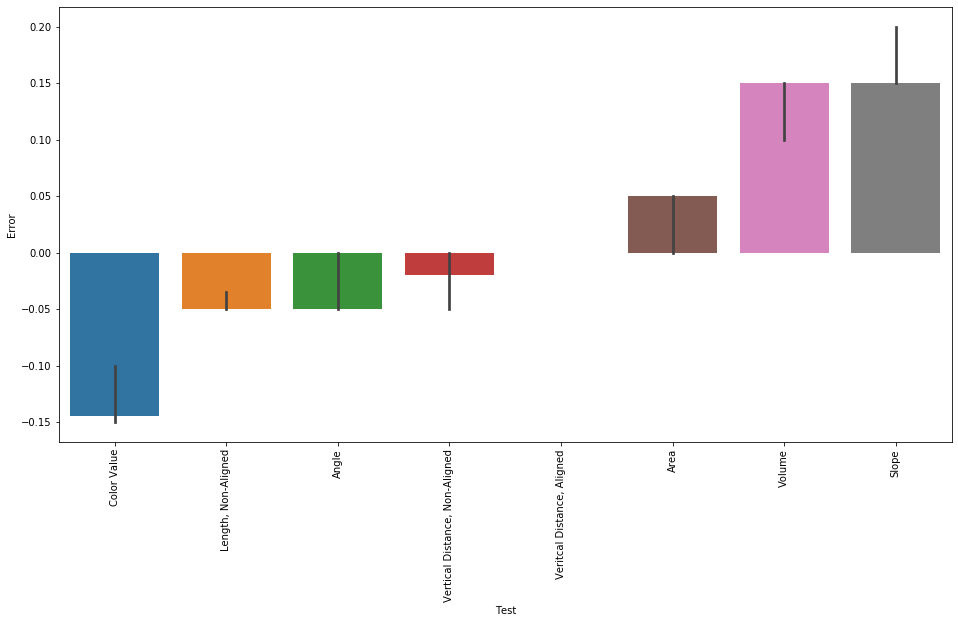

In [83]:
plt.figure(figsize=(16, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(x = data['Test'], y=data['Error'], estimator=np.median, order= list(data[['Error','Test']].groupby('Test').median().sort_values(by='Error').index));

C. A bar graph of the standard deviation of the Error by Test. Remember
that this measures the spread of how widely subjects varied in their responses.
Again, order the x-axis to make the graph clear. 

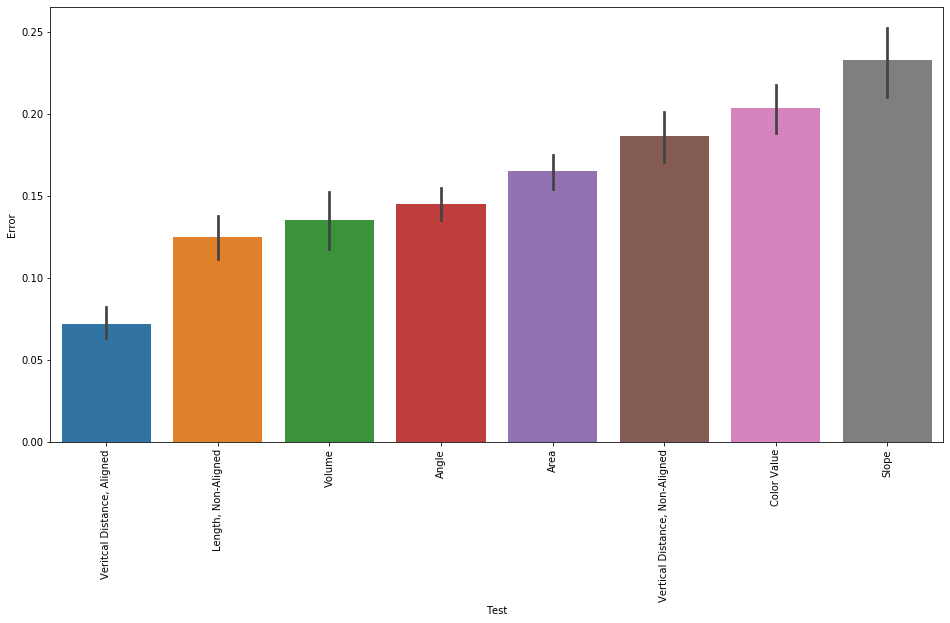

In [85]:
plt.figure(figsize=(16, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(x = data['Test'], y=data['Error'], estimator=np.std, order= list(data[['Error','Test']].groupby('Test').std().sort_values(by='Error').index));

D. Create a new field called AbsoluteError by computing the absolute value
of the Error field you created. Then do the same graph (bar graph) as in (b)
with the AbsoluteError. 

In [87]:
data['ABS_ERROR'] = abs(data['Error'])

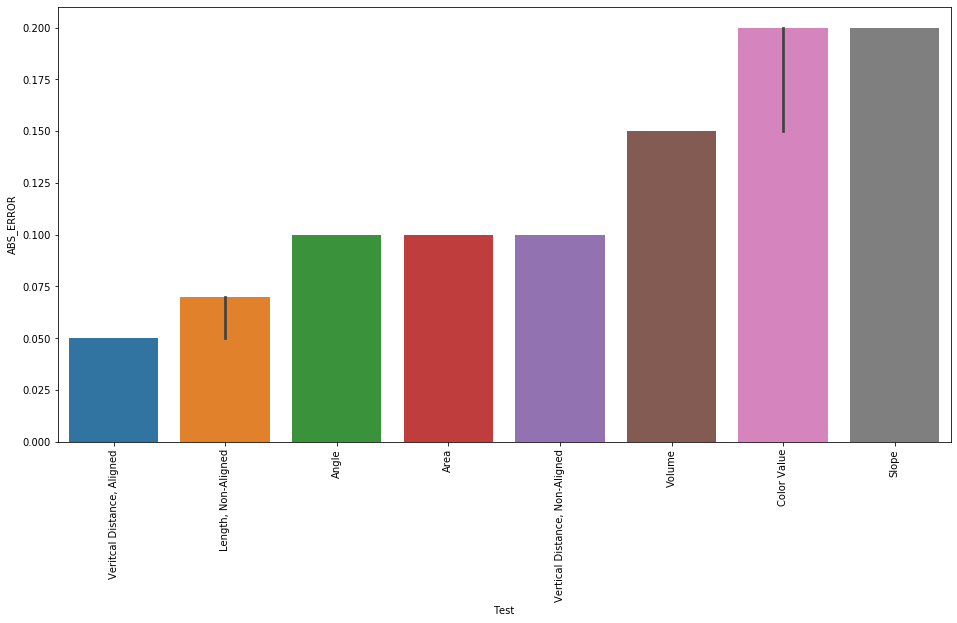

In [88]:
plt.figure(figsize=(16, 8))
# fig, ax = plt.subplots()
plt.xticks(rotation=90)
sns.barplot(x = data['Test'], y=data['ABS_ERROR'], estimator=np.median, order= list(data[['ABS_ERROR','Test']].groupby('Test').median().sort_values(by='ABS_ERROR').index));